In [1]:
import openamundsen as oa
import xarray as xr

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


# Run Model

In [2]:
config = oa.read_config('open_amundsen_config.yml')  # read in configuration file
model = oa.OpenAmundsen(config)  # create OpenAmundsen object and populate unspecified parameters with default values

In [3]:
model.initialize()  # read in input data files, initialize state variables etc.

2025-02-13 16:01:22 | INFO     | Initializing model grid
2025-02-13 16:01:22 | INFO     | Grid has dimensions 337x280
2025-02-13 16:01:22 | INFO     | Reading DEM (../data/openamundsen/dem_uppereastriver_50.asc)
2025-02-13 16:01:22 | INFO     | Calculating sky view factor
2025-02-13 16:01:22 | INFO     | Calculating sky view factor for azimuth=0° (1/36)
2025-02-13 16:01:22 | INFO     | Calculating sky view factor for azimuth=10° (2/36)
2025-02-13 16:01:22 | INFO     | Calculating sky view factor for azimuth=20° (3/36)
2025-02-13 16:01:22 | INFO     | Calculating sky view factor for azimuth=30° (4/36)
2025-02-13 16:01:22 | INFO     | Calculating sky view factor for azimuth=40° (5/36)
2025-02-13 16:01:22 | INFO     | Calculating sky view factor for azimuth=50° (6/36)
2025-02-13 16:01:22 | INFO     | Calculating sky view factor for azimuth=60° (7/36)
2025-02-13 16:01:22 | INFO     | Calculating sky view factor for azimuth=70° (8/36)
2025-02-13 16:01:22 | INFO     | Calculating sky view fa

In [4]:
model.run()  # run the model

2025-02-13 16:01:25 | INFO     | Starting model run
2025-02-13 16:01:25 | INFO     | Processing time step 2022-11-16 00:00
2025-02-13 16:01:25 | INFO     | Processing time step 2022-11-16 03:00
2025-02-13 16:01:25 | INFO     | Processing time step 2022-11-16 06:00
2025-02-13 16:01:25 | INFO     | Processing time step 2022-11-16 09:00
2025-02-13 16:01:25 | INFO     | Processing time step 2022-11-16 12:00
2025-02-13 16:01:25 | INFO     | Processing time step 2022-11-16 15:00
2025-02-13 16:01:25 | INFO     | Processing time step 2022-11-16 18:00
2025-02-13 16:01:25 | INFO     | Processing time step 2022-11-16 21:00
2025-02-13 16:01:25 | INFO     | Processing time step 2022-11-17 00:00
2025-02-13 16:01:25 | INFO     | Processing time step 2022-11-17 03:00
2025-02-13 16:01:25 | INFO     | Processing time step 2022-11-17 06:00
2025-02-13 16:01:25 | INFO     | Processing time step 2022-11-17 09:00
2025-02-13 16:01:25 | INFO     | Processing time step 2022-11-17 12:00
2025-02-13 16:01:25 | INF

In [5]:
ls openamundsen_results/

output_grids.nc       output_timeseries.nc


# Examine results

**something is wrong with the input precip inputs - they are getting doubled somehow**

In [6]:
results = xr.open_dataset("openamundsen_results/output_timeseries.nc")

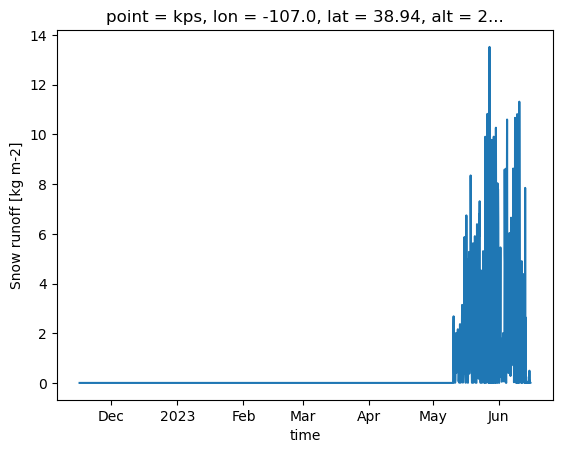

In [7]:
results.runoff.sel(point='kps').plot()

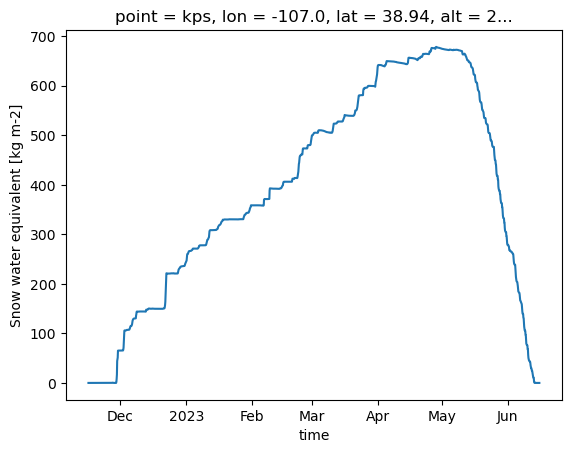

In [8]:
results.swe.sel(point='kps').plot()

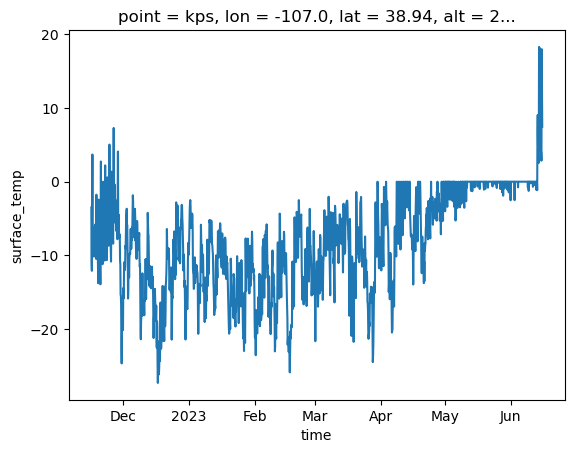

In [9]:
(results.surface_temp - 273.15).sel(point='kps').plot()

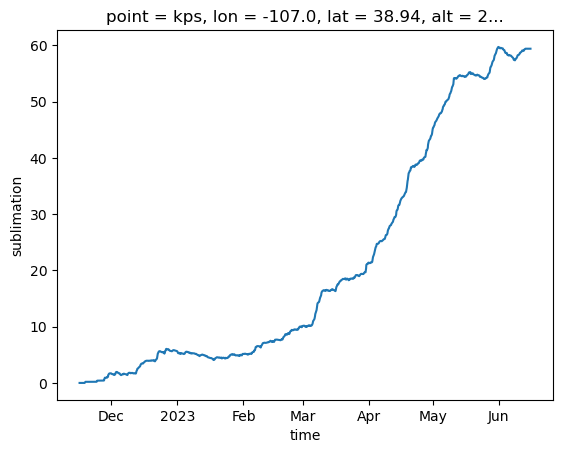

In [10]:
results['sublimation'].sel(point='kps').cumsum().plot()

In [11]:
results = xr.open_dataset("openamundsen_results/output_grids.nc")

In [12]:
results['melt'].time1.values

AttributeError: 'DataArray' object has no attribute 'time1'

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharex=True, sharey=True)

# Plot for April
axes[0].set_title('April')
results['melt'].sel(time1='2023-04-30T21:00:00.000000000').plot(ax=axes[0], cmap='Blues', vmin=0, vmax=600)

# # Plot for May
axes[1].set_title('May')
results['melt'].sel(time1='2023-05-31T21:00:00.000000000').plot(ax=axes[1], cmap='Blues', vmin=0, vmax=600)

# Add a shared colorbar
# fig.colorbar(axes[0].collections[0], ax=axes, location='right', pad=0.05)

for ax in axes.flatten():
    ax.set_xlim(320000, 337500)
    ax.set_ylim(4300000, 4325000)
    ax.set_aspect('equal')
plt.tight_layout()
plt.show()